In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### EDA

In [40]:
data=pd.read_csv('data/heart_2020_cleaned.csv',nrows=5000)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [41]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [42]:
data.shape

(5000, 18)

In [43]:
data.size

90000

In [44]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [45]:
data.duplicated().sum()

6

In [46]:
data.drop_duplicates(inplace=True)

In [47]:
data.duplicated().sum()

0

### Label Encoding

In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col]).astype(int)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,15,1,0,0,3,27,0,0,7,5,2,1,4,4,1,0,1
1,0,122,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,442,1,0,0,19,27,0,1,9,5,2,1,1,7,1,0,0
3,0,314,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,288,0,0,0,27,0,1,0,4,5,0,1,4,7,0,0,0


### Outlier detection

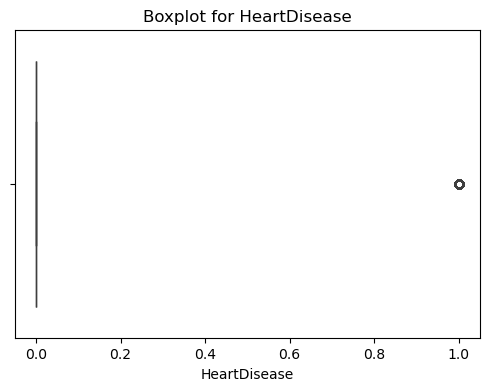

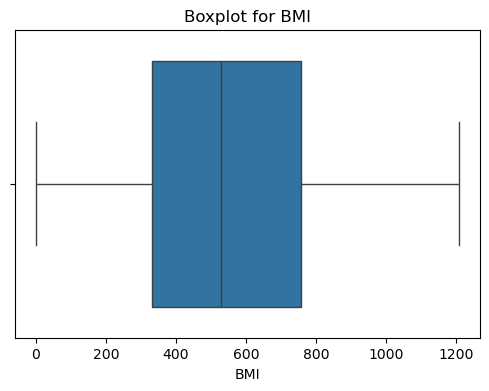

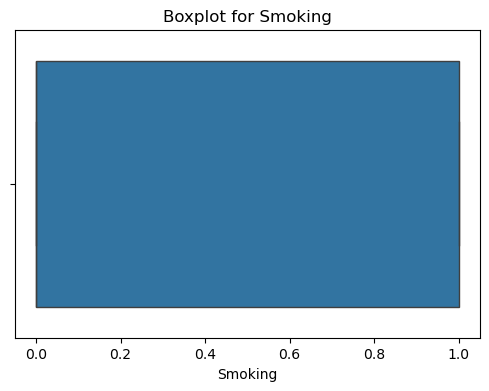

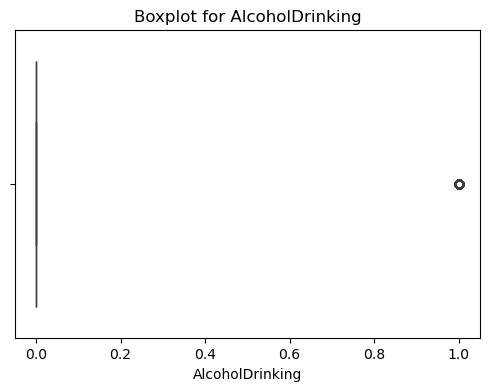

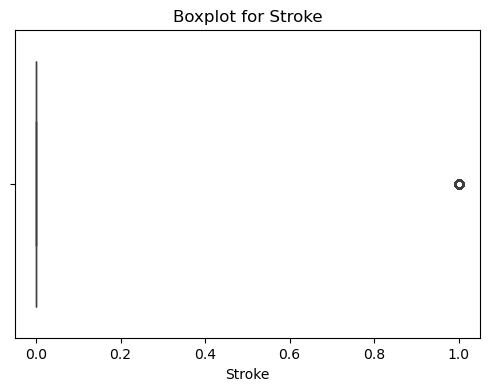

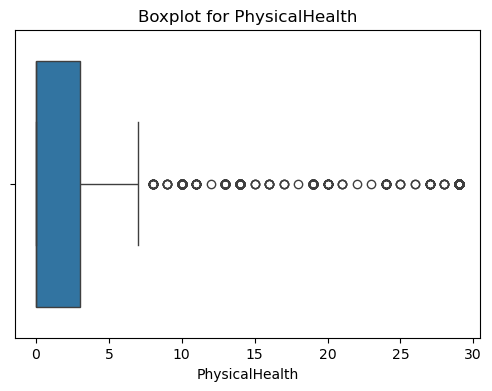

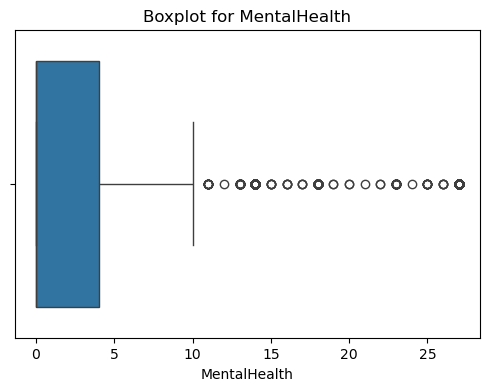

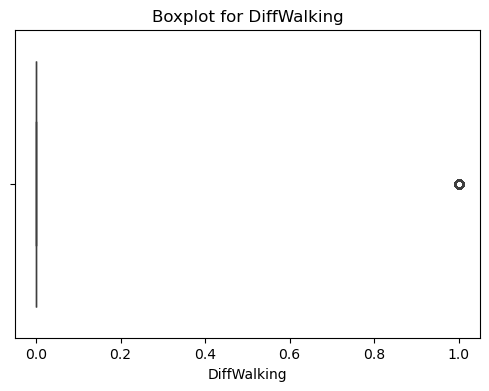

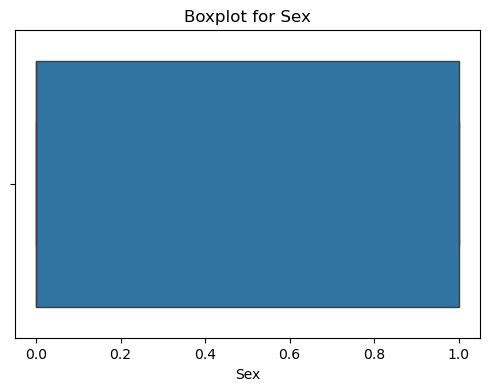

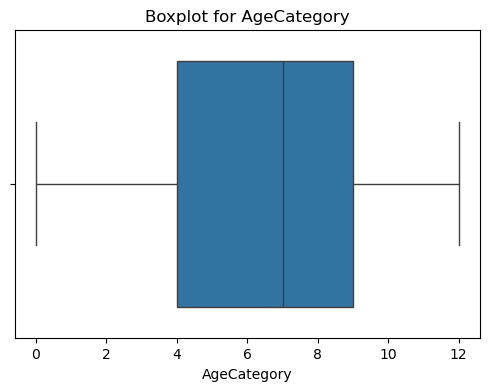

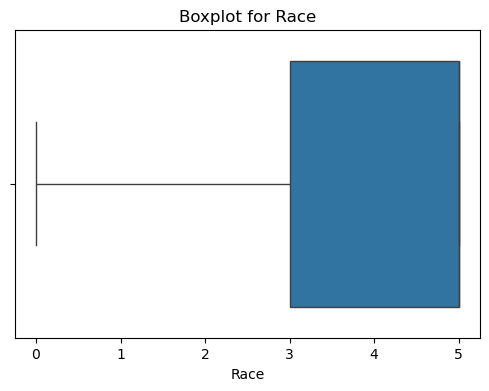

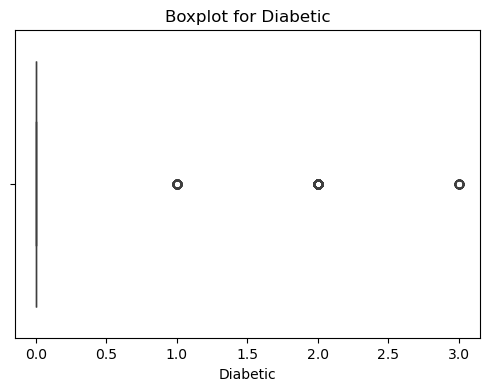

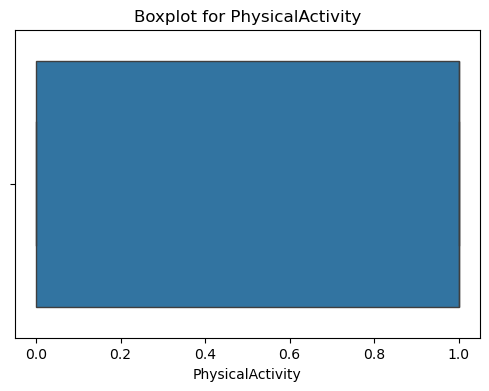

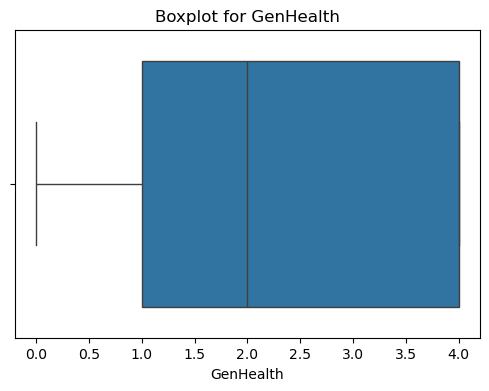

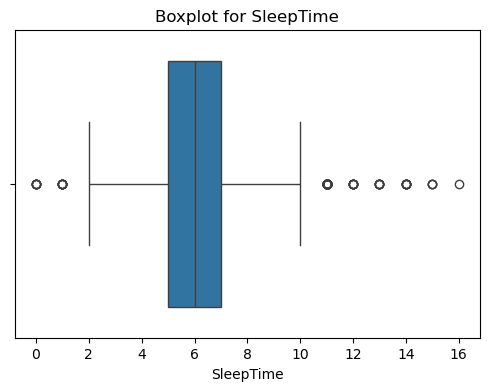

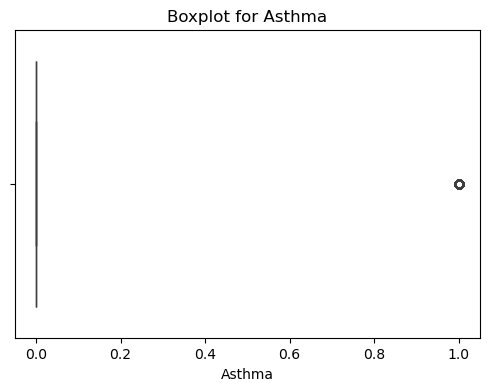

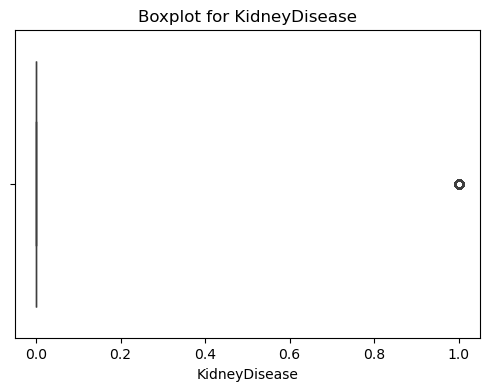

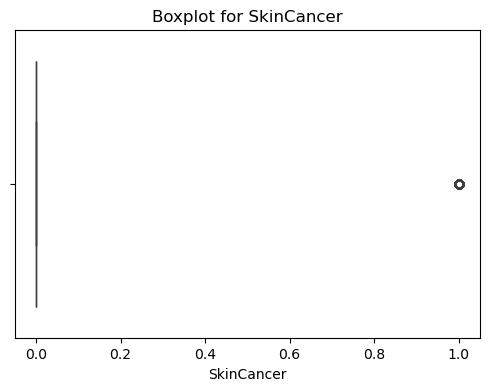

In [51]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Outlier Handling

In [53]:
def handle_outliers_clip(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)    
    return df

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   HeartDisease  BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0   15        1                0       0             3.0   
1             0  122        0                0       0             0.0   
2             0  442        1                0       0             7.5   
3             0  314        0                0       0             0.0   
4             0  288        0                0       0             7.5   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0            10            0    0            7     5         0   
1             0            0    0           12     5         0   
2            10            0    1            9     5         0   
3             0            0    0           11     5         0   
4             0            0    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4          4       0              0           0  


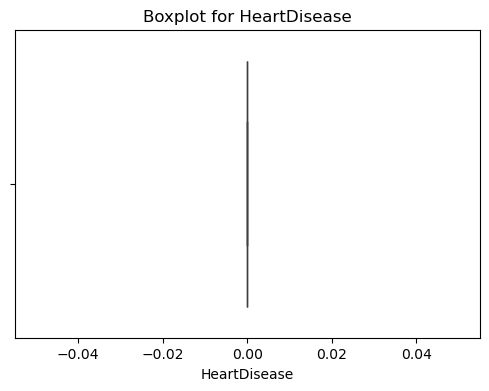

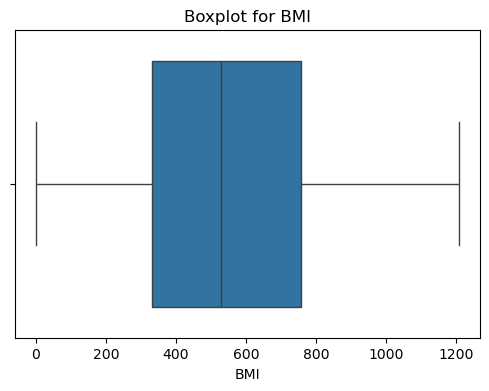

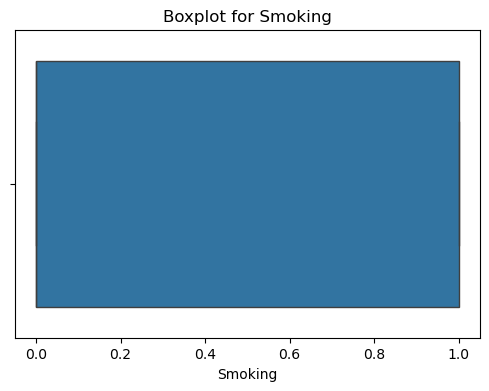

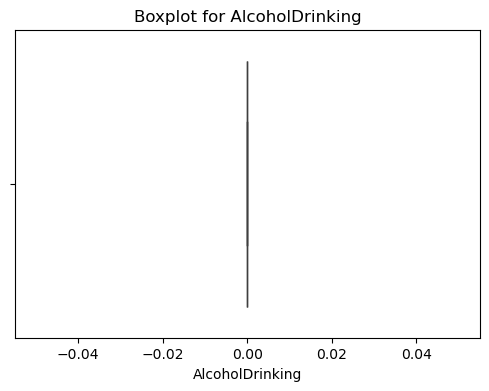

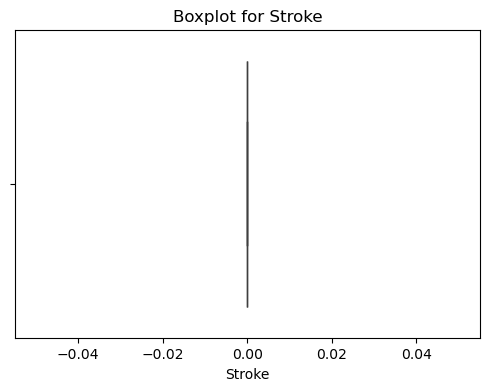

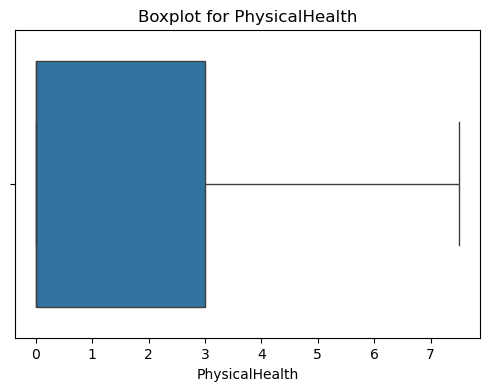

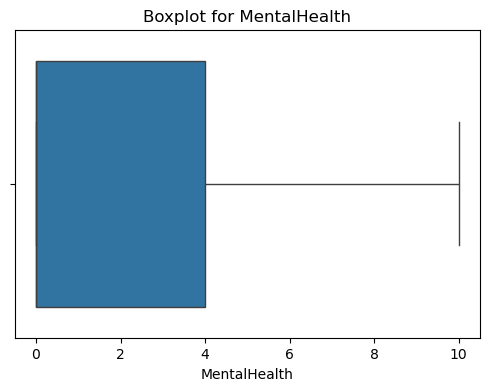

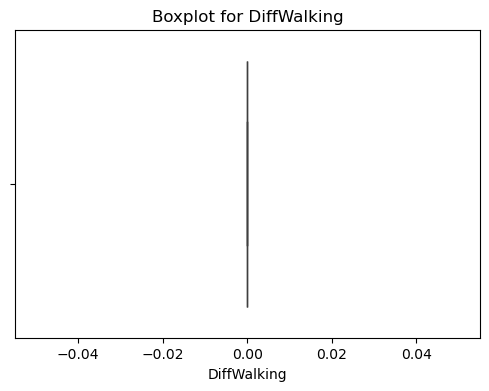

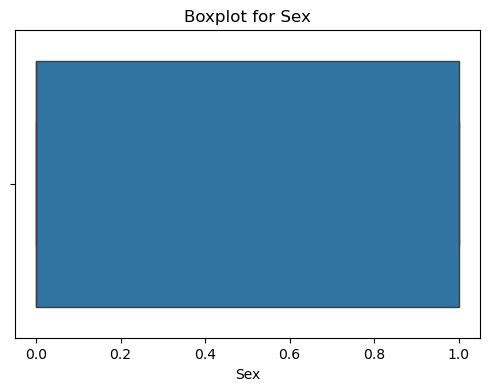

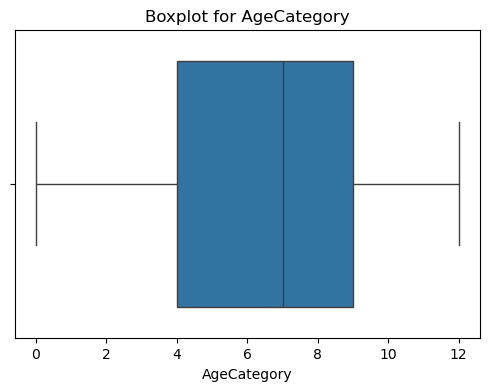

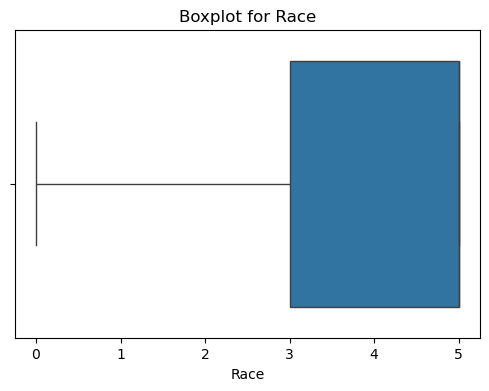

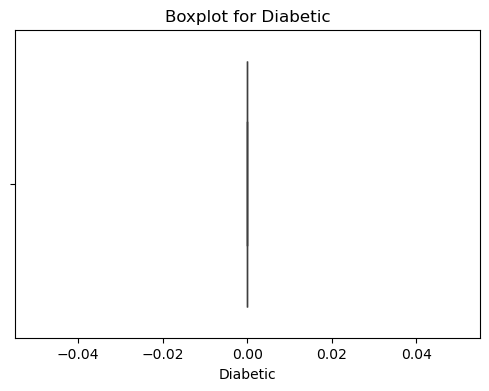

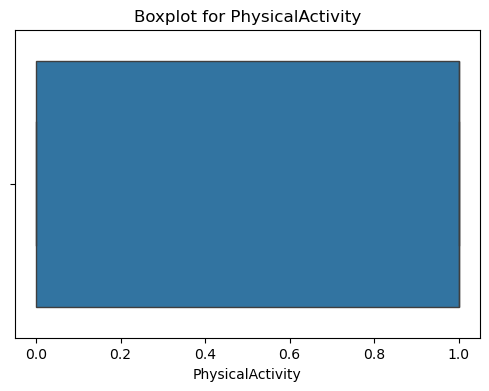

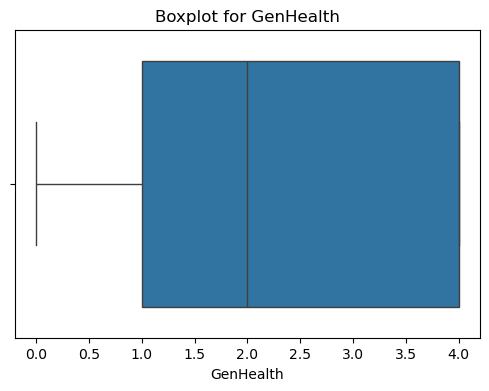

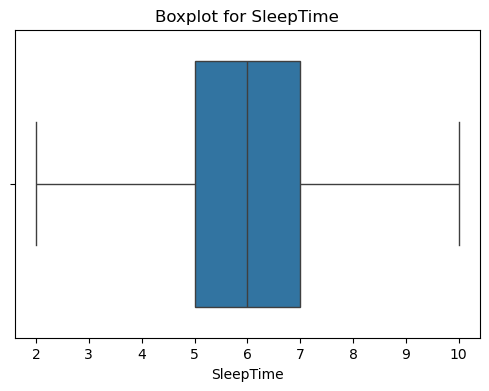

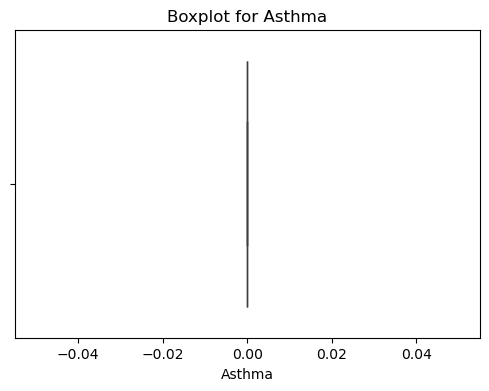

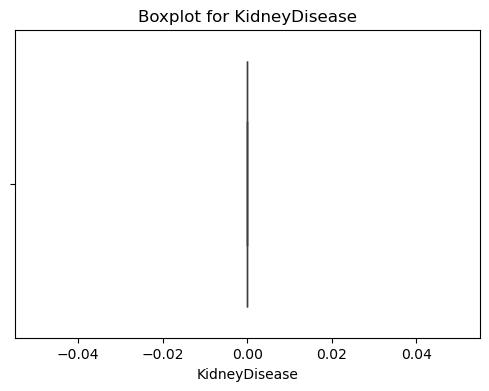

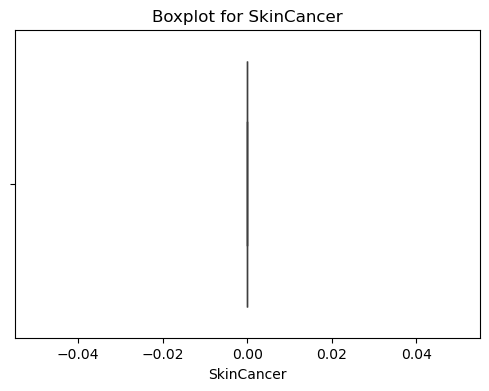

In [54]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Target and Features

In [56]:
y = data['HeartDisease']
X = data.drop(columns=['HeartDisease'])

### Train test split

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(3495, 17) (1499, 17)
HeartDisease
0    3495
Name: count, dtype: int64
HeartDisease
0    1499
Name: count, dtype: int64


### Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])

[[ 0.14560719  1.15056647  0.          0.         -0.63072612 -0.64035224
   0.         -0.84801786  1.52218723 -2.9824031   0.         -1.59181425
  -1.52976383  0.66311242  0.          0.          0.        ]
 [ 1.94737428 -0.8691371   0.          0.          0.39888051  1.45714644
   0.         -0.84801786 -0.21421413 -1.55001354  0.          0.628214
  -0.14447439 -0.73301885  0.          0.          0.        ]
 [-0.20901496  1.15056647  0.          0.          1.08528492  1.98152111
   0.          1.17922045 -1.95061549 -1.55001354  0.          0.628214
   1.24081504  0.66311242  0.          0.          0.        ]
 [-0.23408926  1.15056647  0.          0.         -0.63072612 -0.64035224
   0.          1.17922045 -0.79301459  0.5985708   0.          0.628214
  -1.52976383 -0.03495321  0.          0.          0.        ]
 [-0.10155371 -0.8691371   0.          0.         -0.63072612 -0.64035224
   0.          1.17922045 -0.50361436  0.5985708   0.          0.628214
  -0.14447439 -0

### Modeling

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifiers = {
    # 'Logistic Regression': LogisticRegression(random_state=42),
    # 'SVM': SVC(kernel='linear'),
    'Random Forest Classifier' : RandomForestClassifier(n_estimators=47, random_state=34),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)  
    y_pred = clf.predict(X_test_scaled)  
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Random Forest Classifier Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1499

    accuracy                           1.00      1499
   macro avg       1.00      1.00      1.00      1499
weighted avg       1.00      1.00      1.00      1499

KNN Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1499

    accuracy                           1.00      1499
   macro avg       1.00      1.00      1.00      1499
weighted avg       1.00      1.00      1.00      1499

Naive Bayes Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1499

    accuracy                           1.00      1499
   macro avg       1.00      1.00      1.00      1499
weighted avg       1.00      1.00      1.00      1499

Decision Tree 

In [ ]:
#END